In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
filename=input("Enter the file name: ")
#newdata1.txt
fd=open(filename,"r")
c=fd.readlines()
g=[]
for i in c:
    u=i.split(" ")
    u[len(u)-1]=u[len(u)-1][:-1]
    g.append(u)

Enter the file name: newdata1.txt


In [3]:
#Assuming that the first row is column names
h=g[0]
g=g[1:]
rows = len(g)

def normalized(data):
    b=(data-min(data))/(max(data)-min(data))
    return b
            
train_size = int(rows*0.8)
test_size = rows-train_size
train=g[:train_size]
test=g[train_size:]

In [4]:
train_data=pd.DataFrame(train,columns=h)
test_data=pd.DataFrame(test,columns=h)
df=pd.DataFrame(g,columns=h)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [6]:
def input_value(data1):
    a=data1
    b=np.array(a)
    b=a.values.astype('float128')
    c=normalized(b)
    return b,c

normal_train=[]
normal_test=[]

train=[]
test=[]

#Should not append targets into the training data
k = h[len(h)-1]

for i in range(len(h)):
    if i is not len(h)-1:
        u, v = input_value(train_data[h[i]])
        train.append(u)
        normal_train.append(v)
        
        u, v = input_value(test_data[h[i]])
        test.append(u)
        normal_test.append(v)
        
    else:
        u, v = input_value(train_data[h[i]])
        train_target=u
        normal_train_target=v
        
        u, v = input_value(test_data[h[i]])
        test_target=u
        normal_test_target=v

In [7]:
m = len(train_target)
k = len(test_target)
x0 = np.zeros(m)
x1 = np.zeros(k)

normal_X_train = np.array([x0])
X_train = np.array([x0])
normal_X_test = np.array([x1])
X_test = np.array([x1])

for i in range(len(h)-1):
    b=np.array([train[i]])
    X_train=np.append(X_train,b,axis=0)
    b=np.array([test[i]])
    X_test=np.append(X_test,b,axis=0)
    b=np.array([normal_train[i]])
    normal_X_train=np.append(normal_X_train,b,axis=0)
    b=np.array([normal_test[i]])
    normal_X_test=np.append(normal_X_test,b,axis=0)
        
# Initial Coefficients
B = np.zeros(len(h))
Y_train = np.array(train_target)
Y_test = np.array(test_target)
normal_Y_train = np.array(normal_train_target)
normal_Y_test = np.array(normal_test_target)

X_train=X_train.T
X_test=X_test.T
normal_X_train=normal_X_train.T
normal_X_test=normal_X_test.T

In [8]:
def cost_function(X, Y, B, lamda):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m) + (lamda/2)*B.dot(B.T)
    return J

In [9]:
def gradient_descent(X, Y, B, alpha, lamda):
    cost_history = [0] * 1000
    BList = [0] * 1000
    m = len(Y)
    for iteration in range(1000):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B, lamda)
        cost_history[iteration] = cost
        BList[iteration] = B
    return B, cost_history, BList

In [10]:
def rmse(Y, Y_pred):
    rmsed = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmsed

def mae(Y, Y_pred):
    maed = np.sum(abs(Y - Y_pred))/len(Y)
    return maed

In [11]:
def graph_plot(x_data, y_data, xl, yl, y, s, text="Default", log=False):
    new1=[]
    new2=[]
    for i in range(len(x_data)-1):
        if str(x_data[i])=="inf" or str(x_data[i])=="nan":
            x=5
        else:
            if log is True:
                new1.append(math.log(x_data[i]))
            else:
                new1.append(x_data[i])
            new2.append((y_data[i]))

    a=new1  
    b=new2
    new1=[]
    new2=[]
    for i in range(len(a)-1):
        if str(a[i])=="inf" or str(a[i])=="nan":
            x=5
        else:
            new1.append(a[i])
            new2.append(b[i])
            
    if(len(x_data)==0 and len(y_data)==0):
        print("Graph cannot be plotted")
    else:    
        plt.plot(new2,new1)
        plt.xlabel(xl)
        plt.xlim(min(new2),max(new2))
        plt.ylim(min(new1),max(new1))
        plt.ylabel(yl)
        plt.figtext(y,s,text)
        plt.show()

In [12]:
def cost(x, y, th):
    diff = x @ th - y
    return np.squeeze((1 / (2 * x.shape[0])) * diff.transpose() @ diff )

def plot_contour(g, c, t):
    th1 = np.linspace(-1000, 1000, num=1000)
    th2 = np.linspace(-1000, 1000, num=1000)
    TH1, TH2 = np.meshgrid(th1, th2)
    u=c.reshape(len(c),1)
    th=t.reshape(len(h),1)
    th_copy = th.copy()
    jv = np.zeros((len(th1), len(th2)))
    for i in range(0,len(th1)):
        th_copy[1][0] = th1[i]
        for j in range(0, len(th2)):
            th_copy[2][0] = th2[j]
            jv[i][j] = cost(g, u, th_copy)

    plt.contour(TH1, TH2, jv)
    plt.show()

In [13]:
inital_cost = cost_function(X_train, Y_train, B ,0)
print("Without Normalization - "+str(inital_cost))
inital_cost = cost_function(normal_X_train, normal_Y_train, B ,0)
print("With Normalization - "+str(inital_cost))

Without Normalization - 331.1214920634920635
With Normalization - 0.110320627082108563585


In [14]:
outputs=[]
alphas = [0.00000001,0.00000005,0.0000001,0.0000005,0.000001,0.000005,0.00001,
          0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]
lambdas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0, 5, 10, 50]
alphaerrors=[]
lamdaerrors=[] 

Min error is 30.934891088309028933
 


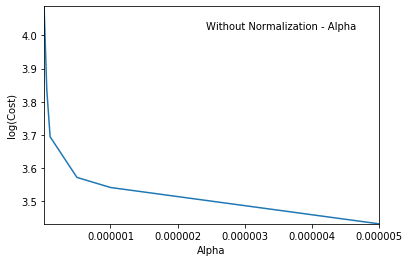

In [15]:
#Cost VS Alpha (Without Normalization)

for alpha in alphas:
    newB, cost_history, S = gradient_descent(X_train, Y_train, B, alpha, 0.001)
    Y_pred = X_test.dot(newB)
    alphaerrors.append(cost_history[len(cost_history)-1])
                
minialpha1 = alphas[alphaerrors.index(min(alphaerrors))]      
print("Min error is "+str((min(alphaerrors))))
print(" ")
        
graph_plot(alphaerrors, alphas, "Alpha", "log(Cost)", 0.5, 0.8, "Without Normalization - Alpha", True)

Min error is 0.006001647079746333041
 


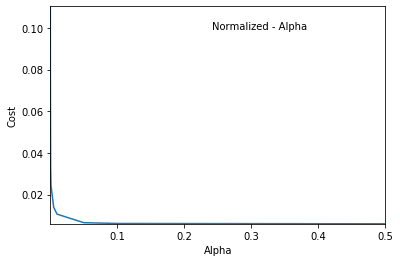

In [16]:
#Cost VS Alpha (With Normalization)

alphaerrors=[]

for alpha in alphas:
    newB, cost_history, D = gradient_descent(normal_X_train, normal_Y_train, B, alpha, 0.001)
    normal_Y_pred = normal_X_test.dot(newB)
    alphaerrors.append(cost_history[len(cost_history)-1])
                
minialpha2 = alphas[alphaerrors.index(min(alphaerrors))]      
print("Min error is "+str((min(alphaerrors))))
print(" ")
        
graph_plot(alphaerrors, alphas, "Alpha", "Cost", 0.5, 0.8, "Normalized - Alpha") 

Min error is 30.934874551646225705
 


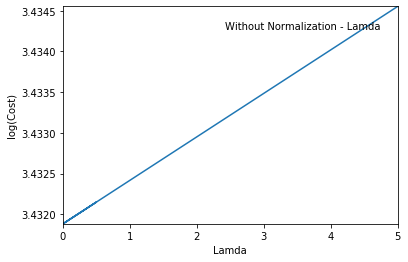

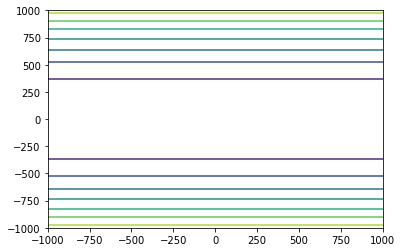

In [17]:
#Cost VS Lamda (Without Normalization)

for l in lambdas:
        newB, cost_history, D = gradient_descent(X_train, Y_train, B, minialpha1, l)
        Y_pred = X_test.dot(newB)
        lamdaerrors.append(cost_history[len(cost_history)-1])
        
print("Min error is "+str((min(lamdaerrors))))
print(" ")

graph_plot(lamdaerrors, lambdas, "Lamda", "log(Cost)", 0.5, 0.8,"Without Normalization - Lamda", True) 
plot_contour(X_test,Y_test,newB)

Min error is 0.005539630083681654065
 


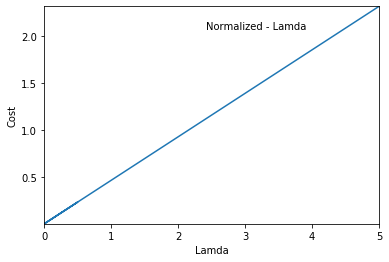

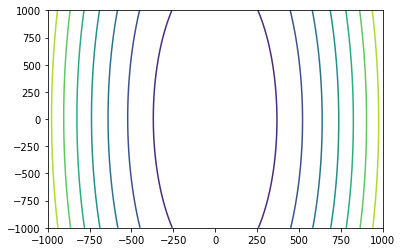

In [18]:
#Cost VS Lamda (With Normalization)

lamdaerrors=[]
bestB = []

for l in lambdas:
        newB, cost_history, D = gradient_descent(normal_X_train, normal_Y_train, B, minialpha2, l)
        if(l is 0.001):
            bestB=newB
        normal_Y_pred = normal_X_test.dot(newB)
        lamdaerrors.append(cost_history[len(cost_history)-1])
        
print("Min error is "+str((min(lamdaerrors))))
print(" ")

graph_plot(lamdaerrors, lambdas, "Lamda", "Cost", 0.5, 0.8, "Normalized - Lamda") 
plot_contour(normal_X_train,normal_Y_train,newB)